### Python packages used in this code

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import platform
import sys
import seaborn as sns

In [2]:
"""
Environments


--Platform--
OS : macOS-10.16-x86_64-i386-64bit
--Version--
python :  3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
numpy : 1.23.1
pandas : 1.4.3
seaborn : 0.11.2
"""

print('--Platform--')
print('OS :', platform.platform())
print('--Version--')
print('python : ', sys.version)
print('numpy :', np.__version__)
print('pandas :', pd.__version__)
print('seaborn :', sns.__version__)

--Platform--
OS : macOS-10.16-x86_64-i386-64bit
--Version--
python :  3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
numpy : 1.23.1
pandas : 1.4.3
seaborn : 0.11.2


# Main codes

## Make results dataframe

In [3]:
df_result = pd.read_csv('../30_Output/30_csv/300_TransferLearning_Result.csv')
df_result.columns = ['Unnamed: 0', 'data_name', 'Number of samples', 'n_itr', 'type', 'Mean squared error', 'Corr', 'MAE', 'R2']
df_result = df_result.replace({'Using only source features':'Only source',
                   'With source features':'Argumented',
                   'Without transfer':'No transfer',
                   'Leraning the residuals':'HTL-offset',
                   'Learning the rates':'HTL-scale'})
df_result['Root mean squared error'] = np.sqrt(df_result['Mean squared error'])

n_sample_list=[5, 15, 10, 20, 30, 50]
target_name_list = ['Torque1','Torque2','Torque3','Torque4','Torque5','Torque6','Torque7']

results = pd.DataFrame(columns=['target', 'type', '5_mean', '5_std', '10_mean', '10_std', '15_mean', '15_std', '20_mean', '20_std', '30_mean', '30_std', '40_mean', '40_std', '50_mean', '50_std', '100_mean', '100_std'])

for target_name in target_name_list:
    for type_name in ['No transfer', 'Only source', 'Argumented', 'HTL-offset', 'HTL-scale', 'Proposed method', 'Proposed method 2', 'Proposed method 3']:
        tmp_data = df_result[(df_result['data_name']==target_name)&(df_result['type']==type_name)]
        df_add = pd.DataFrame(np.array([target_name, 
                               type_name, 
                               tmp_data[tmp_data['Number of samples']==5]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==5]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==10]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==10]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==15]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==15]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==20]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==20]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==30]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==30]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==40]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==40]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==50]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==50]['Root mean squared error'].std(),
                               tmp_data[tmp_data['Number of samples']==100]['Root mean squared error'].mean(),
                               tmp_data[tmp_data['Number of samples']==100]['Root mean squared error'].std()]).reshape(1,-1), 
                              columns=['target', 'type', '5_mean', '5_std', '10_mean', '10_std', '15_mean', '15_std', '20_mean', '20_std', '30_mean', '30_std', '40_mean', '40_std', '50_mean', '50_std', '100_mean', '100_std'],
                              index=[target_name+'_'+type_name])
        results = pd.concat([results, df_add], axis=0)

# Save
results.to_csv('../30_Output/30_csv/420_MakeResults_Table.csv')

results

,target,type,5_mean,5_std,10_mean,10_std,15_mean,15_std,20_mean,20_std,30_mean,30_std,40_mean,40_std,50_mean,50_std,100_mean,100_std
Torque1_No transfer,Torque1,No transfer,21.15637455049178,2.0534072869830213,19.022867959662385,2.043929105305403,17.279162286399337,1.658252597470691,15.821634552558368,1.5722223790933463,13.660656707953194,1.4177115669522258,12.16957554067196,1.5585193877980994,10.813653355153624,1.1094028924945598,nan,nan
Torque1_Only source,Torque1,Only source,24.940624945786663,11.40910490463083,20.309798497241182,1.774442262077755,19.49261011043064,1.4250039653844582,19.329384652278556,1.3475567513372781,18.262096789670377,1.9153761244559637,18.006624305024413,1.7620947389231203,17.541493733207002,1.6284122471829041,nan,nan
Torque1_Argumented,Torque1,Argumented,21.337987891771295,2.3493176396015305,18.941813050377895,1.711757794550648,16.78060217904253,1.2659168821911655,15.346501911791687,1.9709547180393039,12.66854029280391,1.5625402338843035,11.033025337506508,1.5750990531933526,9.925596210107257,1.079760484418554,nan,nan
Torque1_HTL-offset,Torque1,HTL-offset,24.61544185303854,11.52316243788736,19.148486159129128,2.01609113075056,17.6598478659023,1.5801006800837174,17.09837893169705,2.1467992284604716,15.19535439319587,3.3725156882289995,14.2976329337934,3.8210125776898654,12.82998316412073,2.9723095313317867,nan,nan
Torque1_HTL-scale,Torque1,HTL-scale,24.86308694172381,8.527274200327875,20.28748153963462,3.3195908241186043,20.043227909138196,7.541897034480197,19.14422113657173,3.1941860154627673,17.797406364218233,2.82578248953535,18.534231174248365,3.2523224830108393,18.05907681251508,4.441758648467813,nan,nan
Torque1_Proposed method,Torque1,Proposed method,21.336142518646927,2.101697952823966,18.917244528886123,2.0890713788204036,17.442373985812964,1.9260121751706314,15.600117804912927,1.6824906261317116,13.3779759737039,1.953918199796521,11.597938784057032,1.4818063867465419,10.401718798718383,0.9253866423439965,nan,nan
Torque1_Proposed method 2,Torque1,Proposed method 2,21.571693740165045,2.0479859364497983,19.16091962945344,2.1099470593074385,18.052526698313105,1.671685335451479,16.866409583323808,2.85426240790212,15.243747198312601,4.316051415473589,12.130274135775947,1.4349129909599254,11.165391712391864,1.2049913926441804,nan,nan
Torque1_Proposed method 3,Torque1,Proposed method 3,21.393064080231444,1.9082048473543114,18.740649062202948,1.9131369344432758,17.208272632760476,1.377445089077255,15.715879396733637,1.8536939614338273,13.016952318198145,1.4291401643216775,11.507801963175165,1.4739481627182776,10.271647478939371,0.9935720827887303,nan,nan
Torque2_No transfer,Torque2,No transfer,15.801545102304576,2.3808056058799814,12.99513440375315,1.4215801118455211,11.497410940314401,0.965923129439584,10.432129001312056,0.821238076120866,9.392442143589353,0.9777711052015828,8.376863883071561,0.767242631177791,7.7244497598699935,0.7534234345363368,nan,nan
Torque2_Only source,Torque2,Only source,15.308424637260936,2.3121181853604953,12.988157633460915,1.5148865257606057,12.415386317009848,2.215603629169601,11.930092957660966,3.022892693761437,12.128702768263077,7.431748179802955,10.152995848444451,1.8243925122134708,9.448106498290995,1.989738355367546,nan,nan


## Plot

<Figure size 720x360 with 0 Axes>

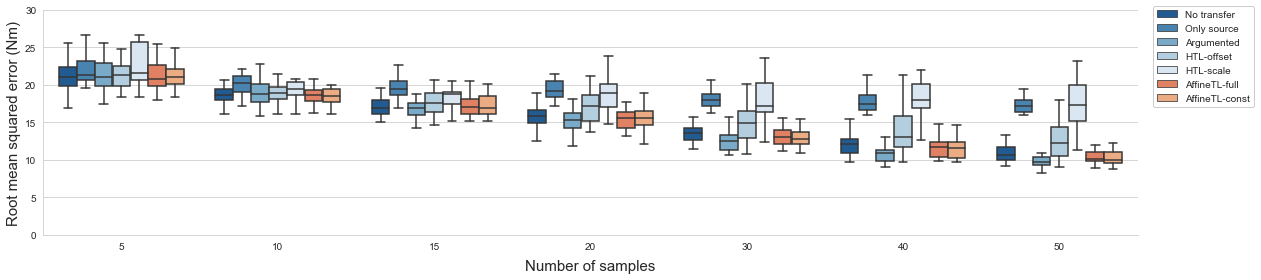

In [4]:
# Remove 'Proposed method 2'
df_result_plt = df_result.loc[df_result['type']!='Proposed method 2']
df_result_plt = df_result_plt.replace('Proposed method 3', 'AffineTL-const')
df_result_plt = df_result_plt.replace('Proposed method', 'AffineTL-full')

# Plot
ylim_list = {'Torque1': [0,30],
             'Torque2': [0,25],
             'Torque3': [0,12],
             'Torque4': [0,20],
             'Torque5': [0,2],
             'Torque6': [0,3],
             'Torque7': [0,4]}
for target_name in ['Torque1']:#target_name_list:
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    ax = sns.catplot(data=df_result_plt[df_result_plt['data_name']==target_name], 
                     kind='box', 
                     x='Number of samples', 
                     y='Root mean squared error', 
                     hue='type', 
                     height=4, 
                     aspect=4, 
                     sym='', 
                     legend_out=False, 
                     palette=[sns.color_palette('Blues_r',5)[0],
                             sns.color_palette('Blues_r',5)[1],
                             sns.color_palette('Blues_r',5)[2],
                             sns.color_palette('Blues_r',5)[3],
                             sns.color_palette('Blues_r',5)[4],
                             sns.color_palette('OrRd')[3],
                             sns.color_palette('OrRd')[2]
                             ])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1.0, 0.98), ncol=1, title=None, frameon=True, facecolor='white', framealpha=1)
    plt.ylim(ylim_list[target_name])
    plt.xlabel('Number of samples', size=15, labelpad=8)
    plt.ylabel('Root mean squared error (Nm)', size=15)
    # plt.title(target_name, size=15)
    plt.tight_layout()
    plt.savefig('../30_Output/20_Plot/400_MakeResults_Boxplot_'+target_name+'.png',  bbox_inches="tight")
    # plt.close()

<Figure size 720x360 with 0 Axes>

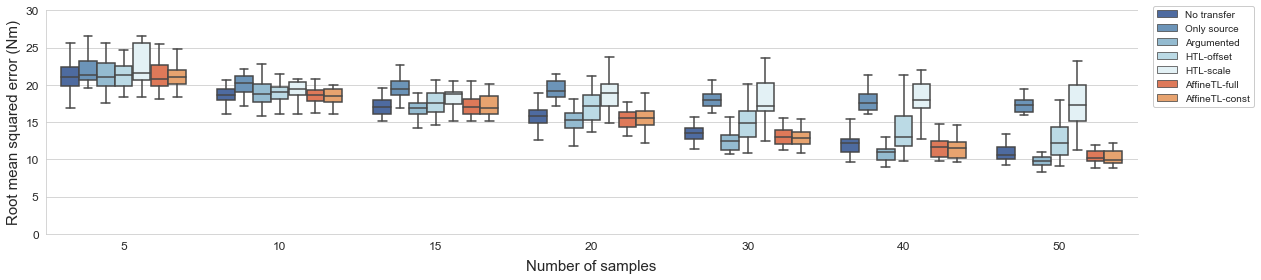

In [5]:
target_name='Torque1'

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = sns.catplot(data=df_result_plt[df_result_plt['data_name']==target_name], 
                 kind='box', 
                 x='Number of samples', 
                 y='Root mean squared error', 
                 hue='type', 
                 height=4, 
                 aspect=4, 
                 sym='', 
                 legend_out=False, 
                 palette=[sns.color_palette('RdYlBu_r',24)[1],
                         sns.color_palette('RdYlBu_r',24)[3],
                         sns.color_palette('RdYlBu_r',24)[5],
                         sns.color_palette('RdYlBu_r',24)[7],
                         sns.color_palette('RdYlBu_r',24)[9],
                         sns.color_palette('RdYlBu_r',24)[19],
                         sns.color_palette('RdYlBu_r',24)[17]
                         ])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.0, 0.98), ncol=1, title=None, frameon=True, facecolor='white', framealpha=1)
plt.ylim(ylim_list[target_name])
plt.xlabel('Number of samples', size=15, labelpad=8)
plt.ylabel('Root mean squared error (Nm)', size=15)
plt.xticks([0,1,2,3,4,5,6], [5,10,15,20,30,40,50], size=12)
plt.yticks([0, 5, 10, 15, 20, 25, 30], size=12)
# plt.title(target_name, size=15)
plt.tight_layout()
plt.savefig('../30_Output/20_Plot/400_MakeResults_Boxplot_'+target_name+'.pdf',  bbox_inches="tight")
# plt.close()

<Figure size 720x360 with 0 Axes>

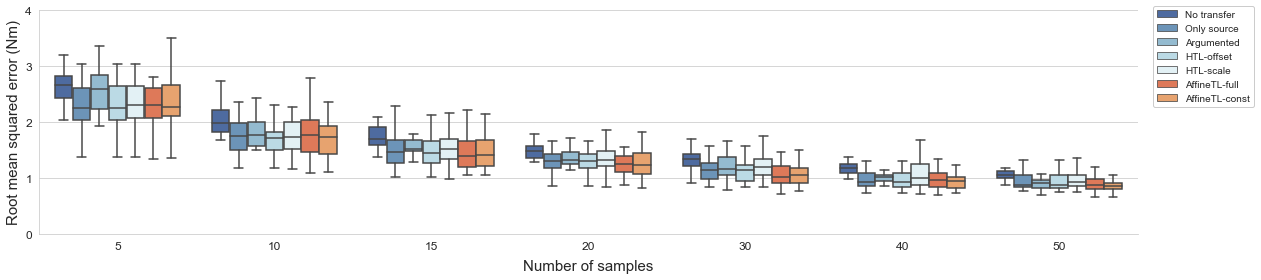

In [6]:
target_name='Torque7'

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = sns.catplot(data=df_result_plt[df_result_plt['data_name']==target_name], 
                 kind='box', 
                 x='Number of samples', 
                 y='Root mean squared error', 
                 hue='type', 
                 height=4, 
                 aspect=4, 
                 sym='', 
                 legend_out=False, 
                 palette=[sns.color_palette('RdYlBu_r',24)[1],
                         sns.color_palette('RdYlBu_r',24)[3],
                         sns.color_palette('RdYlBu_r',24)[5],
                         sns.color_palette('RdYlBu_r',24)[7],
                         sns.color_palette('RdYlBu_r',24)[9],
                         sns.color_palette('RdYlBu_r',24)[19],
                         sns.color_palette('RdYlBu_r',24)[17]
                         ])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.0, 0.98), ncol=1, title=None, frameon=True, facecolor='white', framealpha=1)
plt.ylim(ylim_list[target_name])
plt.xlabel('Number of samples', size=15, labelpad=8)
plt.ylabel('Root mean squared error (Nm)', size=15)
plt.xticks([0,1,2,3,4,5,6], [5,10,15,20,30,40,50], size=12)
plt.yticks([0,1,2,3,4], size=12)
# plt.title(target_name, size=15)
plt.tight_layout()
plt.savefig('../30_Output/20_Plot/400_MakeResults_Boxplot_'+target_name+'.pdf',  bbox_inches="tight")
# plt.close()